Conf number: 0, beta: 0
Successfully created configurations.
Conf number: 0, beta: 0.1
Successfully created configurations.
Conf number: 0, beta: 0.2
Successfully created configurations.
Conf number: 0, beta: 0.3
Successfully created configurations.
Conf number: 0, beta: 0.4
Successfully created configurations.
Conf number: 0, beta: 0.5
Successfully created configurations.
Conf number: 0, beta: 0.6
Successfully created configurations.
Conf number: 0, beta: 0.7
Successfully created configurations.
Conf number: 0, beta: 0.8
Successfully created configurations.
Conf number: 0, beta: 0.9
Successfully created configurations.
Conf number: 0, beta: 1
Successfully created configurations.
Conf number: 0, beta: 1.1
Successfully created configurations.
Conf number: 0, beta: 1.2
Successfully created configurations.
Conf number: 0, beta: 1.3
Successfully created configurations.
Conf number: 0, beta: 1.4
Successfully created configurations.
Conf number: 0, beta: 1.5
Successfully created configuratio

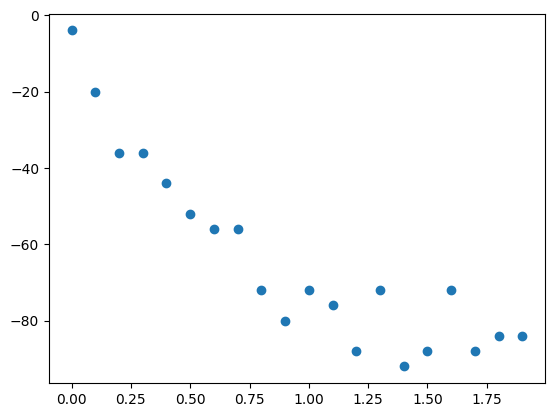

In [1]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# parameters
conf_n = 1
mc_sweep = 1000
dim = 1
num = 100

subprocess.run(["g++", "-o", "main", "ND_ising_model.cpp", "ND_ising_system.cpp"], check=True)

df_full = pd.DataFrame({"beta": [], "energies": [], "mags": []})

beta_values = []
energy_values = []
mag_values = []

for b in range(0, 20):
    subprocess.run(["./main", str(num), str(dim), str(mc_sweep), str(conf_n), str(b * 0.1)], check=True)
    df = pd.read_csv("output.csv")

    beta_values.append(b * 0.1)
    energy_values.append(df["energy_total"].values.tolist())  # Convert to list
    mag_values.append(df["magnetisation"].values.tolist())  # Convert to list

df_full["beta"] = beta_values
df_full["energies"] = energy_values
df_full["mags"] = mag_values

plt.scatter(df_full["beta"], [np.array(x).mean() for x in df_full["energies"]])
plt.savefig("energy_v_beta.png")

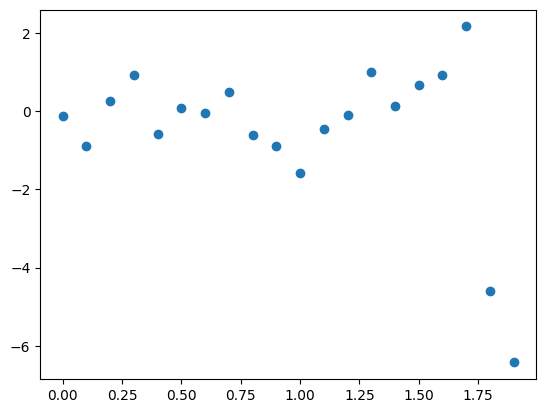

In [55]:
plt.scatter(df_full["beta"], [np.array(x).mean() for x in df_full["mags"]])
plt.savefig("magnet_v_beta.png")

/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


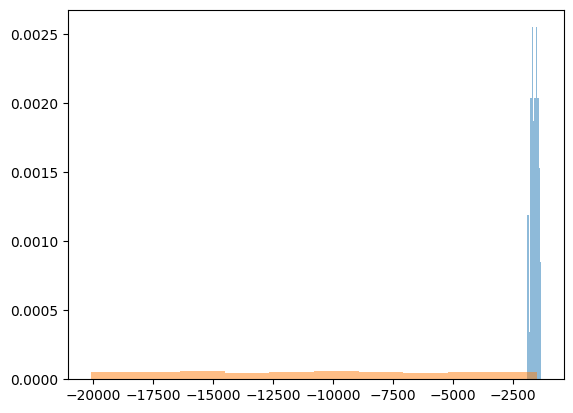

In [57]:
for i in range(0, 10):
    plt.hist(df_full[df_full["beta"] == i]["energies"], alpha=0.5, density=True, bins=10)